In [1]:
from keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

Using TensorFlow backend.


In [2]:
model.layers.pop()

In [3]:
for l in model.layers:
    if l.name == 'fc211':
        l.trainable = True
    else:
        l.trainable = False
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

In [4]:
from keras.layers import Dense
from keras.models import Model
from keras.optimizers import Adam

new_layer = Dense(8, activation='softmax', name='my_dense')

inp = model.input
out = new_layer(model.layers[-1].output)

model2 = Model(inp, out)
model2.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_1 (InputLayer)             (None, 224, 224, 3)   0                                            
____________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D) (None, 230, 230, 3)   0                                            
____________________________________________________________________________________________________
conv1 (Conv2D)                   (None, 112, 112, 64)  9472                                         
____________________________________________________________________________________________________
bn_conv1 (BatchNormalization)    (None, 112, 112, 64)  256                                          
___________________________________________________________________________________________

In [5]:
from keras.optimizers import Adam

model2.compile(loss='categorical_crossentropy',optimizer=Adam(lr=0.001),metrics=['accuracy'])

In [6]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        rotation_range=90,
        horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        '/home/ubuntu/data/fishing/train',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
        '/home/ubuntu/data/fishing/valid',
        target_size=(224, 224),
        batch_size=16,
        class_mode='categorical')

Found 3276 images belonging to 8 classes.
Found 500 images belonging to 8 classes.


In [ ]:
model2.fit_generator(
        train_generator,
        steps_per_epoch=200,
        epochs=1,
        validation_data=validation_generator,
        validation_steps=200)
#         class_weight = {0: 220.,1: 1888.,2: 3227., 3: 5636., 4: 812., 5: 1263., 6: 2145., 7: 514.})

Epoch 1/1
114/200 [================>.............] - ETA: 32s - loss: 1.9060 - acc: 0.3169

In [16]:
model2.optimizer.lr = 0.01

In [8]:
model2.load_weights('/home/ubuntu/data/fishing/weights/fish_ft_resnet80.h5')

In [19]:
real_test_gen = test_datagen.flow_from_directory(
        '/home/ubuntu/data/fishing/test_stg1',
        target_size=(224, 224),
        batch_size=10,
        shuffle=False,
        class_mode=None)

Found 1000 images belonging to 1 classes.


In [22]:
test_pred_all = model2.predict_generator(real_test_gen,100)


In [24]:
files = np.array([real_test_gen.filenames]).T
all_preds = np.hstack((np.round(test_pred_all,decimals=3), files))
all_preds[:5]

array([['0.68599998951', '0.0309999994934', '0.0010000000475',
        '0.0520000010729', '0.0010000000475', '0.0509999990463',
        '0.00200000009499', '0.175999999046', 'unknown/img_06681.jpg'],
       ['0.60900002718', '0.0750000029802', '0.00400000018999',
        '0.00499999988824', '0.0010000000475', '0.0759999975562', '0.0',
        '0.229000002146', 'unknown/img_06893.jpg'],
       ['0.294999986887', '0.035000000149', '0.00200000009499',
        '0.0240000002086', '0.0', '0.616999983788', '0.0',
        '0.0270000007004', 'unknown/img_05393.jpg'],
       ['0.266000002623', '0.00999999977648', '0.0', '0.00200000009499',
        '0.0610000006855', '0.0540000014007', '0.0', '0.605000019073',
        'unknown/img_01918.jpg'],
       ['0.688000023365', '0.01600000076', '0.0010000000475',
        '0.0729999989271', '0.0', '0.171000003815', '0.0010000000475',
        '0.0500000007451', 'unknown/img_05568.jpg']], 
      dtype='|S32')

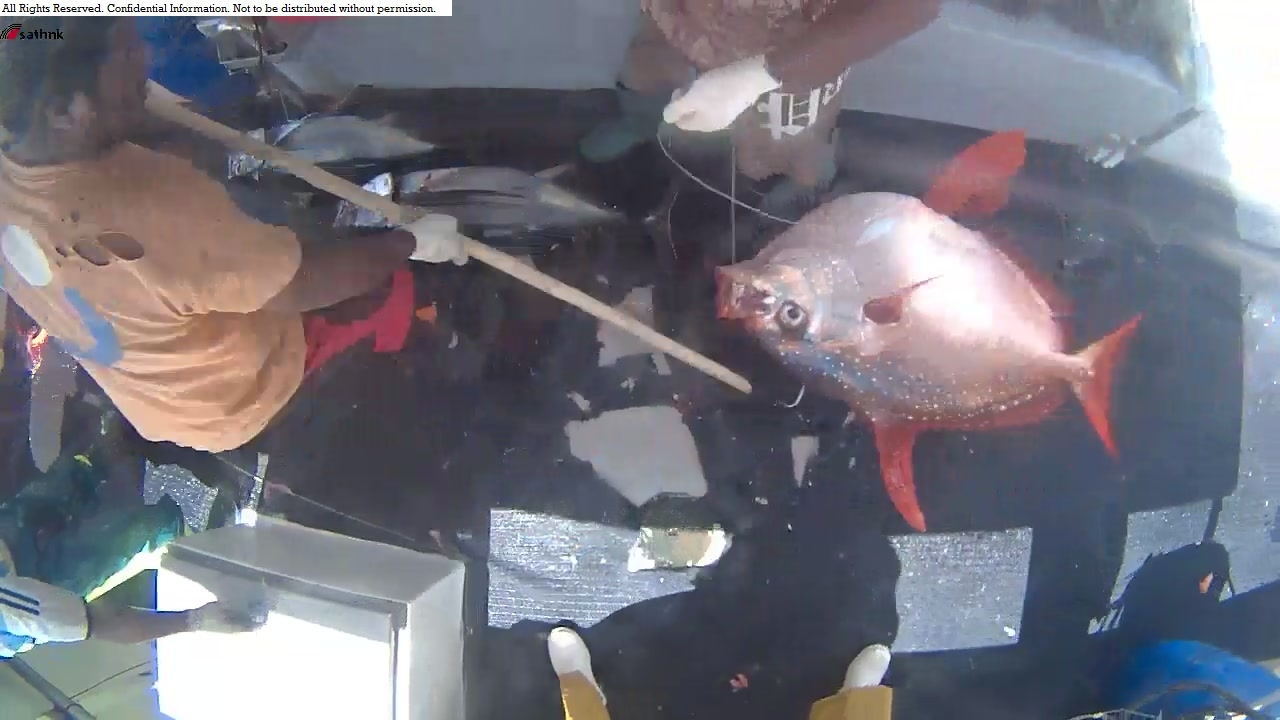

In [49]:
from IPython.display import Image

img_path = '/home/ubuntu/data/fishing/test_stg1/unknown/img_06681.jpg'

Image(filename=img_path) 

In [54]:
train_generator.class_indices

{'ALB': 0,
 'BET': 1,
 'DOL': 2,
 'LAG': 3,
 'NoF': 4,
 'OTHER': 5,
 'SHARK': 6,
 'YFT': 7}

In [28]:
validation_generator.class_indices

{'ALB': 0,
 'BET': 1,
 'DOL': 2,
 'LAG': 3,
 'NoF': 4,
 'OTHER': 5,
 'SHARK': 6,
 'YFT': 7}

In [ ]:
# train: 1718, 200, 117, 67, 465, 299, 176, 734... total 3776
# valid: 226, 28, 9, 9, 59, 41, 24, 104.. total 500

In [42]:
num_train_files = np.array([1718., 200., 117., 67., 465., 299., 176., 734.])
num_valid_files = np.array([226., 28., 9., 9., 59., 41., 24., 104.])
total_train = 3776.
total_valid = 500.
for num in num_train_files: 
    proportion = 1/(num/total_train)*100
    print(num,proportion)

(1718.0, 219.79045401629804)
(200.0, 1888.0000000000002)
(117.0, 3227.3504273504273)
(67.0, 5635.8208955223881)
(465.0, 812.04301075268802)
(299.0, 1262.876254180602)
(176.0, 2145.4545454545455)
(734.0, 514.44141689373294)


In [47]:
train_generator.samples

3277